<a href="https://colab.research.google.com/github/Gaurav201820/DeloitteBatchA/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
hiringdetails = pd.read_csv('HR_Hiring_details_transaction.csv')
joiningstatus = pd.read_csv('Joining_Status.csv')
locationmaster = pd.read_excel('Location_Master.xlsx')
regionlocationmapping = pd.read_excel('Region_Location_Mapping.xlsx')
regionmaster = pd.read_excel('Region_Master.xlsx')
domicile_master = pd.read_excel('Domicile_Master.xlsx')

In [178]:
hiringdetails.head()

,Sno,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Postal_Code,Age,LOB_Id,Domicile_Id
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,L001,201301,34.0,1,D6
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,L002,600020,34.0,2,D9
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,201301,27.0,2,D10
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,201301,34.0,2,D3
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,201301,34.0,2,D21


In [179]:
del hiringdetails['Postal_Code']
del hiringdetails['LOB_Id']
del hiringdetails['Sno']

In [180]:
hiringdetails['Offered_Band'].fillna('E1',inplace=True)
hiringdetails['Age'].fillna(34.0,inplace=True)

In [181]:
hire_merge=hiringdetails.merge(locationmaster,on='Location_ID')

In [182]:
hire = hire_merge.merge(joiningstatus,on='Candidate_Ref')

In [183]:
hire.isna().sum()

Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Age                             0
Domicile_Id                     0
Location                        0
Status                          0
dtype: int64

In [184]:
for x in hire.index:
    hire['Percent_difference_CTC'] = hire['Percent_hike_expected_in_CTC'] - hire['Percent_hike_offered_in_CTC']


In [185]:
hire['Percent_hike_expected_in_CTC']=abs(hire[['Percent_hike_expected_in_CTC']])
hire['Percent_hike_offered_in_CTC']=abs(hire[['Percent_hike_offered_in_CTC']])

In [186]:
hire.head()

,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Age,Domicile_Id,Location,Status
0,2110407,Yes,14,30,E2,20.79,13.16,-33.95,No,No,Female,Agency,7,L001,34.0,D6,Noida,Joined
1,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,27.0,D10,Noida,Joined
2,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,34.0,D3,Noida,Joined
3,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,34.0,D21,Noida,Joined
4,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,L001,34.0,D24,Noida,Joined


# ***TASK 1***

## **Q1.  Analysis of percentage joined of offer released.**

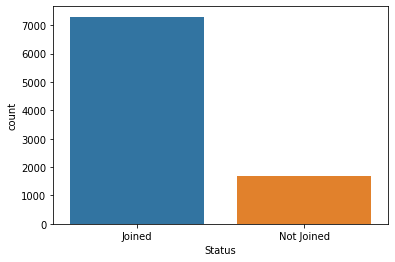

In [187]:
sns.countplot(data=hire,x='Status')

## **Q2.  What are the key drivers that influence the candidate joining/not joining a company?**

  Analyzing the Status vs Percent Hike Offered

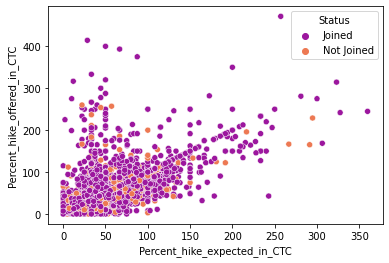

In [188]:
sns.scatterplot(data=hire,x='Percent_hike_expected_in_CTC',y='Percent_hike_offered_in_CTC',hue='Status',palette='plasma')

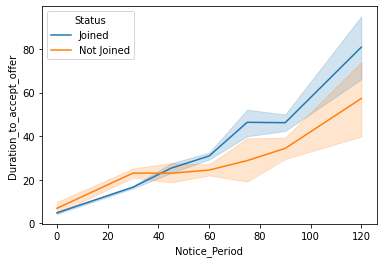

In [189]:
sns.lineplot(data=hire,x='Notice_Period',y='Duration_to_accept_offer',hue='Status')

## 4. Analyzing the percent hike offered and offered band on status

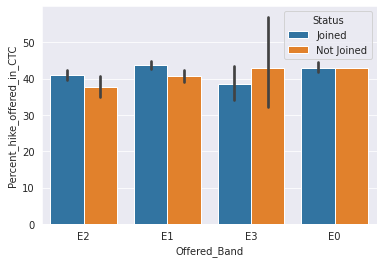

In [206]:
sns.barplot(data=hire,x='Offered_Band',y='Percent_hike_offered_in_CTC',hue='Status')

## Q3. Are there specific locations where candidates are not joining?

['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Mumbai' 'Ahmedabad']


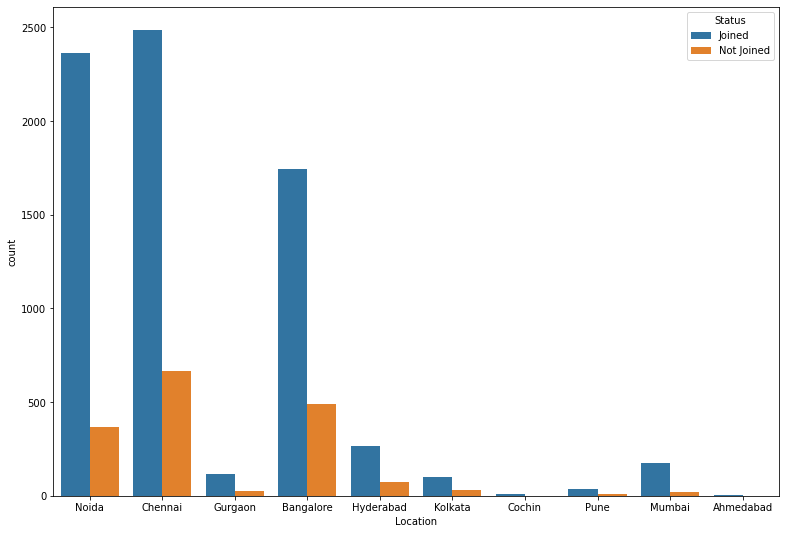

In [191]:
print(hire['Location'].unique())
plt.figure(figsize=(13,9))
sns.countplot(data=hire,x='Location',hue='Status')

## **Q4. Joining status depends on the duration to accept an offer?**

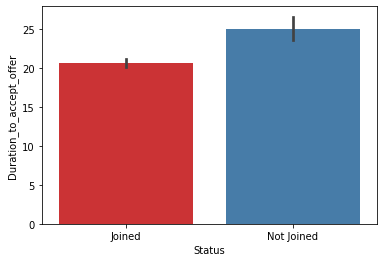

In [192]:
sns.barplot(data=hire,y='Duration_to_accept_offer',x='Status',palette='Set1')

## **Q5. Hike offered has an impact on joining status.?**

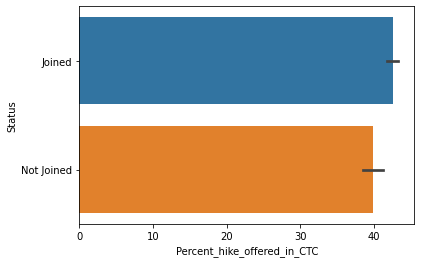

In [193]:
sns.barplot(data=hire,x='Percent_hike_offered_in_CTC',y='Status')

# ***TASK 2.2 (Exploratory Data Analysis)***

## Q1. Univariate, Bi- Variate Analysis and Multi- Variate Analysis

## Univariate Analysis

In [194]:
hire.head()

,Candidate_Ref,DOJ_Extended,Duration_to_accept_offer,Notice_Period,Offered_Band,Percent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,Location_ID,Age,Domicile_Id,Location,Status
0,2110407,Yes,14,30,E2,20.79,13.16,-33.95,No,No,Female,Agency,7,L001,34.0,D6,Noida,Joined
1,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,L001,27.0,D10,Noida,Joined
2,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,L001,34.0,D3,Noida,Joined
3,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,L001,34.0,D21,Noida,Joined
4,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,L001,34.0,D24,Noida,Joined


#### Analysis on the Candidate relocation

In [235]:
print(hire['Candidate_relocate_actual'].mode())
print(hire['Candidate_relocate_actual'][hire['Candidate_relocate_actual']=='Yes'].count())

0    No
dtype: object
1288


##### ***Inference :*** Majority of candidates are not required to relocate. But there are some who are required to relocated with the count of 1288.

#### Analysis on the Offered Band

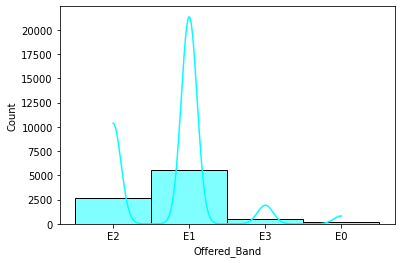

In [195]:
sns.histplot(data=hire,x='Offered_Band',color='cyan',kde=True)

##### ***Inference*** : There are more number of candidates joining in the E1 band. The count shows around 5000 candidates approx offered to E1 band.

#### Analysis on the Years of experience

Mean of years of experience: 4.24




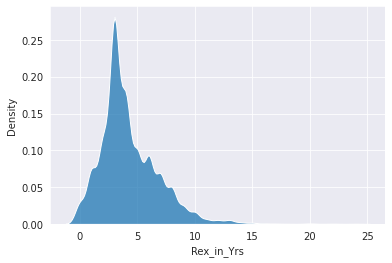

In [211]:
print('Mean of years of experience:',round(np.mean(hire['Rex_in_Yrs']),2))
print('\n')
sns.kdeplot(data=hire,x='Rex_in_Yrs',shade=True,multiple='stack')

###### ***Inference :*** The above graph shows the years of experience as a distribution plot. The rex_in_yrs is nomrmally distributed. The mean experience of the candidates are 4.24

#### Analysis on the Percent Hike Offered 

Max Hike Offered: 471.43
Min Hike offered: 0.0
Mean: 42.080103540414




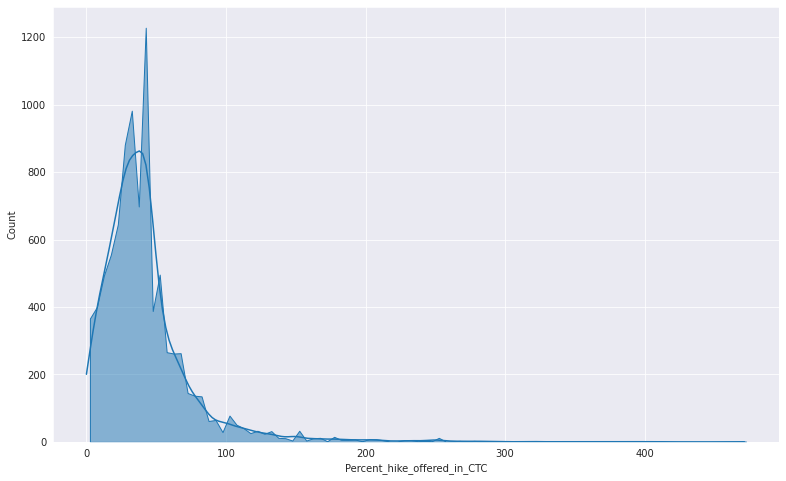

In [219]:
print('Max Hike Offered:',np.max(hire['Percent_hike_offered_in_CTC']))
print('Min Hike offered:',np.min(hire['Percent_hike_offered_in_CTC']))
print('Mean:',np.mean(hire['Percent_hike_offered_in_CTC']))
print('\n')
plt.figure(figsize=(13,8))
sns.histplot(data=hire,x='Percent_hike_offered_in_CTC',stat='count',bins=20,binwidth=5,kde=True,element='poly')

#### Analysis on Joining Status

0    Joined
dtype: object


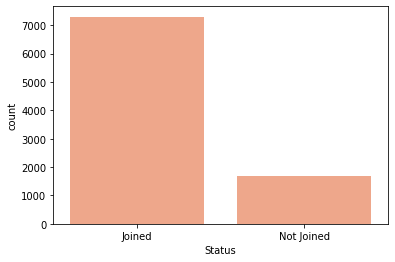

In [198]:
sns.countplot(data=hire,x='Status',color='lightsalmon')
print(hire['Status'].mode())

## Bivariate Analaysis

#### Analysis of Percentage hike offered vs Status

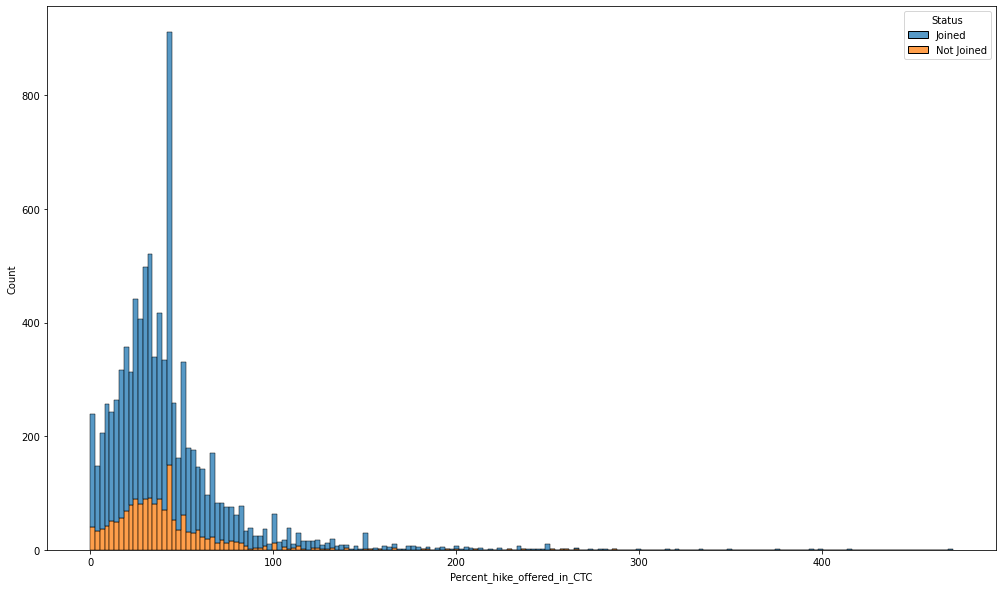

In [199]:
plt.figure(figsize=(17,10))
sns.histplot(data=hire,x='Percent_hike_offered_in_CTC',hue='Status',multiple='stack')

#### Analysis of Joining Bonus vs Status

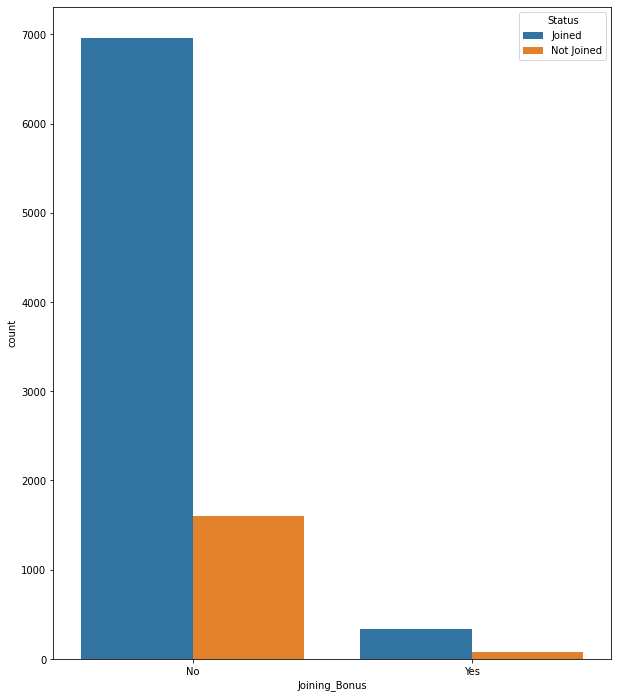

In [200]:
plt.figure(figsize=(10,12))
sns.countplot(data=hire,hue='Status',x='Joining_Bonus')

#### Analysis of Offered Band vd Percentage hike offered

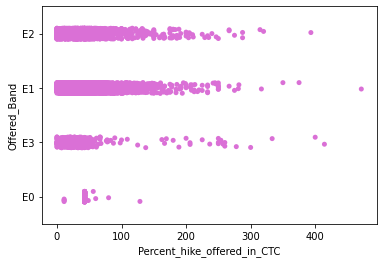

In [201]:
sns.stripplot(data=hire,y='Offered_Band',x='Percent_hike_offered_in_CTC',color='orchid')

#### Analysis of the percentage hike offered vs Years of Experience

In [202]:
newdf=hire[['Percent_hike_offered_in_CTC','Rex_in_Yrs']]
print(newdf.corr())

                             Percent_hike_offered_in_CTC  Rex_in_Yrs
Percent_hike_offered_in_CTC                     1.000000   -0.115852
Rex_in_Yrs                                     -0.115852    1.000000


#### Analysis of Gender vs Status 

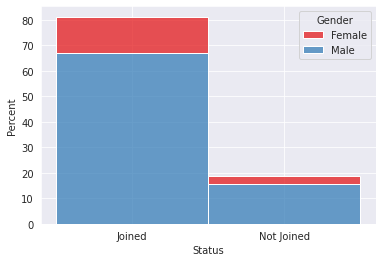

In [230]:
sns.histplot(data=hire,x='Status',hue='Gender',stat='percent',multiple='stack',palette='Set1')

## Multivariate Analysis

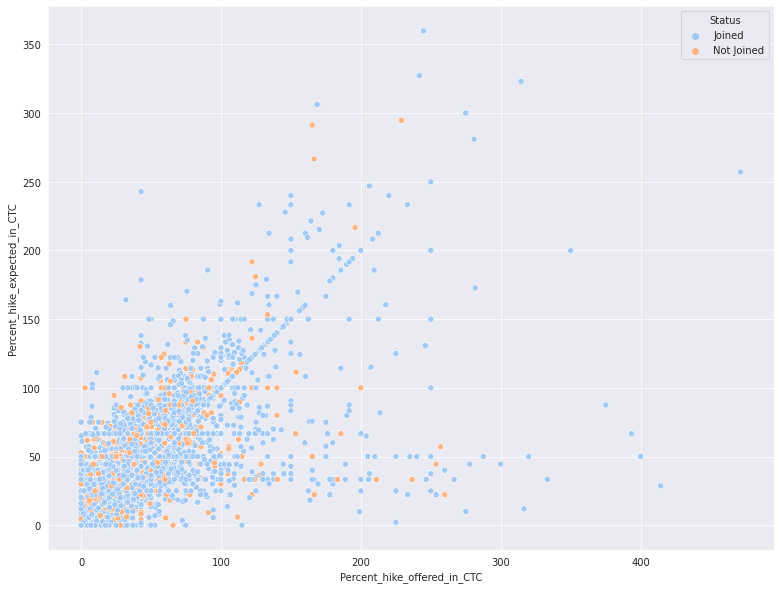

In [241]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=hire,x='Percent_hike_offered_in_CTC',y='Percent_hike_expected_in_CTC',hue='Status',palette='pastel')

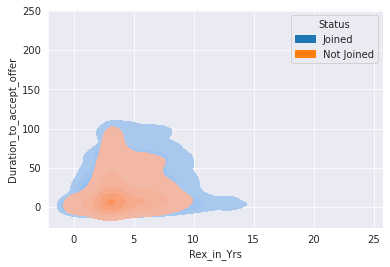

In [246]:
sns.kdeplot(data=hire,y='Duration_to_accept_offer',x='Rex_in_Yrs',hue='Status',fill=True)

## Q2. Missing values identification and treatment (Already been handled)

In [260]:
hire.isna().sum()

Candidate_Ref                   0
DOJ_Extended                    0
Duration_to_accept_offer        0
Notice_Period                   0
Offered_Band                    0
Percent_hike_expected_in_CTC    0
Percent_hike_offered_in_CTC     0
Percent_difference_CTC          0
Joining_Bonus                   0
Candidate_relocate_actual       0
Gender                          0
Candidate_Source                0
Rex_in_Yrs                      0
Location_ID                     0
Age                             0
Domicile_Id                     0
Location                        0
Status                          0
dtype: int64

## Q3. Outlier analysis and treatment 